#### This notebook overplots the SDSS DR14 spectra on the DR7 spectra of all our targets.  The three spectra plotted at the end are BOSS spectra, not DR14, as the legend suggests.

-------


In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import richardsplot
from SDSSRM_11_Pix_Filter_Trevor import pixel_filter

In [2]:
def make_sameName(i): #remove necessary characters to match image formatting (only to arcsec, remove SDSS) -- elim J as well : 8/23
    
    i = list(i)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(9)
    i.pop(9)
    i.pop(9)
    i.pop(9)

    i = ''.join(i)

    return i

In [3]:
df = pd.read_csv('../SpringFinalFigs_moreParams.csv')
df.sort_values('DR14_PLATES', inplace=True)

plates = df[['PLATE_1']].values.flatten()
SDSS = df[["name"]].values.flatten()
#duni_mask = df["UNI_DET"] #detection/non-detection and uniform/non-uniform
blueshift = df[["VOFF_CIV_PEAK_1"]].values
eqw = df[["EW_CIV_1"]].values

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


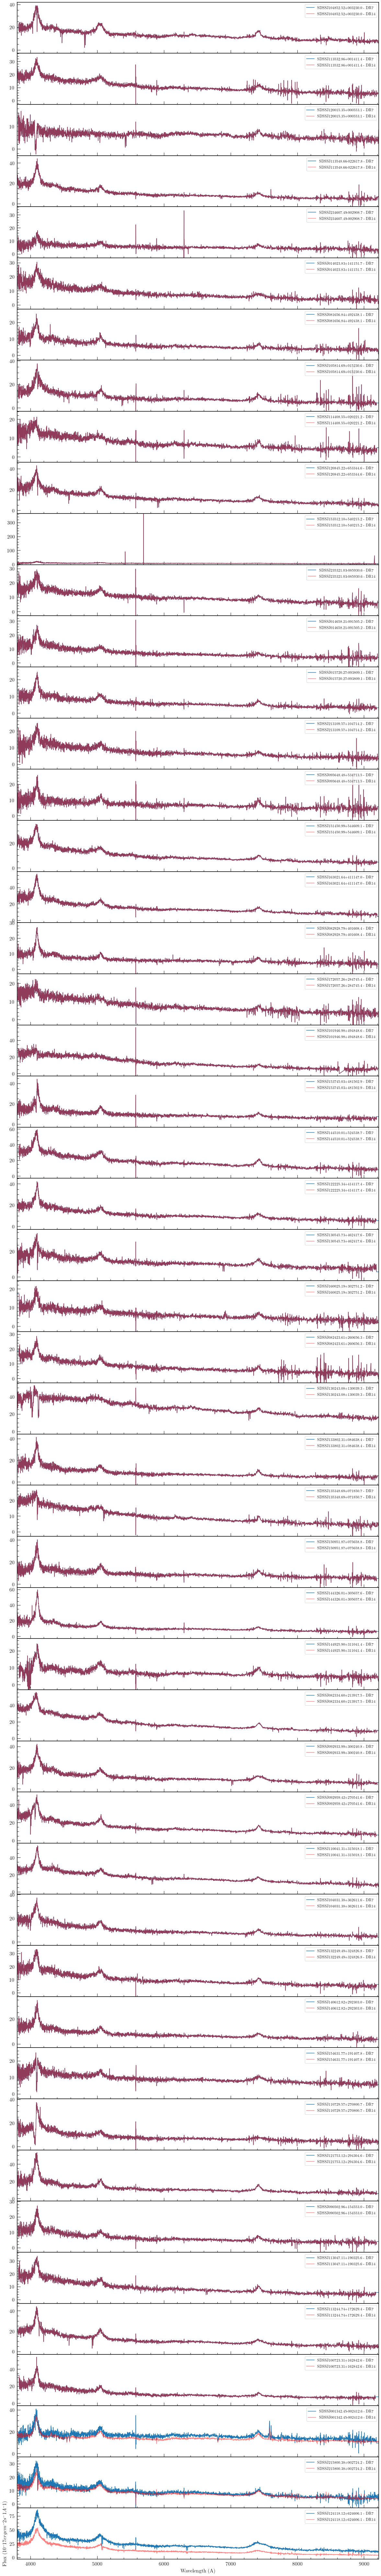

In [4]:
path = 'spectro/1d_26/'

#Change number of subplots when adding more spectra
fig, axs = plt.subplots(50, sharex=True, figsize = (20,145), gridspec_kw={'hspace': 0})

for i in range(len(plates)):
    for spectra in os.listdir(path+str(plates[i])+'/1d'):
        if not spectra.startswith('.'):
            hdulist = fits.open(path+str(plates[i])+'/1d/'+spectra, ignore_missing_end=True) #navigate to each fits file and open

            sdss_c0 = hdulist[0].header['coeff0']
            sdss_c1 = hdulist[0].header['coeff1']
            sdss_npix = hdulist[0].header['naxis1']
            sdss_loglam = sdss_c0 + sdss_c1*np.arange(sdss_npix)

            sdss_wave = 10.**(sdss_loglam)  #x-axis: wavelength
            sdss_flux = hdulist[0].data[0]  #y-axis: flux

            axs[i].plot(sdss_wave, sdss_flux, label=SDSS[i]+' - DR7')
            axs[i].set_xlim([min(sdss_wave), max(sdss_wave)]) #wavelength domain covered by spectra
            axs[i].set_ylim([-3,max(sdss_flux)+3]) #eliminate whitespace in y-direction - changes for each target                
            
            hdulist.close()
   

        

#Now overplot DR14 spectra
#Use rsync download file from SDSS to loop through files on my machine (sorted by plates)
infile = open('../DR14/download_rsync.txt').read()
spectra = infile.splitlines()
spectra_path = ['../DR14/dr14'+i for i in spectra]

#This file has dr14 plates and names -- use to save .fits files later for each spectrum
infile2 = '../DR14/dr14_plates.csv'
df2 = pd.read_csv(infile2)
df2.sort_values('PLATE', inplace=True)
names = df2[['name']].values.flatten()

for spectrum,name,i in zip(spectra_path,names,range(50)):
    #Open each spectrum's file
    hdulist = fits.open(spectrum, ignore_missing_end=True) #navigate to each fits file and open

    sdss_c0 = hdulist[0].header['coeff0']
    sdss_c1 = hdulist[0].header['coeff1']
    sdss_npix = hdulist[1].header['naxis2']

    #define/take some values
    sdss_flux = hdulist[1].data.field(0)
    sdss_loglam = hdulist[1].data.field(1)
    sdss_wave = 10.**(sdss_loglam)  #x-axis: wavelength
    
    axs[i].plot(sdss_wave, sdss_flux, color='r', alpha=0.5, label=name+' - DR14')
    
    axs[i].legend(loc="upper right")
    
    hdulist.close()
    
    



plt.xlabel('Wavelength (A)')
plt.ylabel('Flux ($10^-17 erg cm^-2 s^-1 A^-1)$')
plt.show()